In [1]:
#importing a library to read a file
import pandas as pd

In [2]:
#file reading
data=pd.read_csv('C:/Users/F/Downloads/SolarPrediction.csv/SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
#changing the name of some columns
data=data.rename(columns={'Data': 'Date', 'WindDirection(Degrees)': 'Wind Direction (°)'})

In [4]:
#getting general information about a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNIXTime            32686 non-null  int64  
 1   Date                32686 non-null  object 
 2   Time                32686 non-null  object 
 3   Radiation           32686 non-null  float64
 4   Temperature         32686 non-null  int64  
 5   Pressure            32686 non-null  float64
 6   Humidity            32686 non-null  int64  
 7   Wind Direction (°)  32686 non-null  float64
 8   Speed               32686 non-null  float64
 9   TimeSunRise         32686 non-null  object 
 10  TimeSunSet          32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
# setting the format of time data
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])
# creating new columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Time'].dt.hour

data['TimeSunRise']=pd.to_datetime(data['TimeSunRise'])
data['TimeSunSet']=pd.to_datetime(data['TimeSunSet'])
data['DayLength']=data['TimeSunSet']- data['TimeSunRise']
data['DayLength']=data['DayLength'].dt.total_seconds()
data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,Wind Direction (°),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,DayLength
0,1475229326,2016-09-29,2020-10-08 23:55:26,1.21,48,30.46,59,177.39,5.62,2020-10-08 06:13:00,2020-10-08 18:13:00,2016,9,29,23,43200.0
1,1475229023,2016-09-29,2020-10-08 23:50:23,1.21,48,30.46,58,176.78,3.37,2020-10-08 06:13:00,2020-10-08 18:13:00,2016,9,29,23,43200.0
2,1475228726,2016-09-29,2020-10-08 23:45:26,1.23,48,30.46,57,158.75,3.37,2020-10-08 06:13:00,2020-10-08 18:13:00,2016,9,29,23,43200.0
3,1475228421,2016-09-29,2020-10-08 23:40:21,1.21,48,30.46,60,137.71,3.37,2020-10-08 06:13:00,2020-10-08 18:13:00,2016,9,29,23,43200.0
4,1475228124,2016-09-29,2020-10-08 23:35:24,1.17,48,30.46,62,104.95,5.62,2020-10-08 06:13:00,2020-10-08 18:13:00,2016,9,29,23,43200.0


In [6]:
#determining the values of low-variance features
print(data['Year'].value_counts(), data['Month'].value_counts(), sep='\n')


2016    32686
Name: Year, dtype: int64
10    8821
11    8284
12    8164
9     7417
Name: Month, dtype: int64


In [8]:
# due to the fact that 'Year' has only one value, it can be discarded
data=data.drop(['Year'], axis=1)

In [9]:
# import of a libraries to visualize the relationship of some features
import seaborn as sns
import matplotlib.pyplot as plt

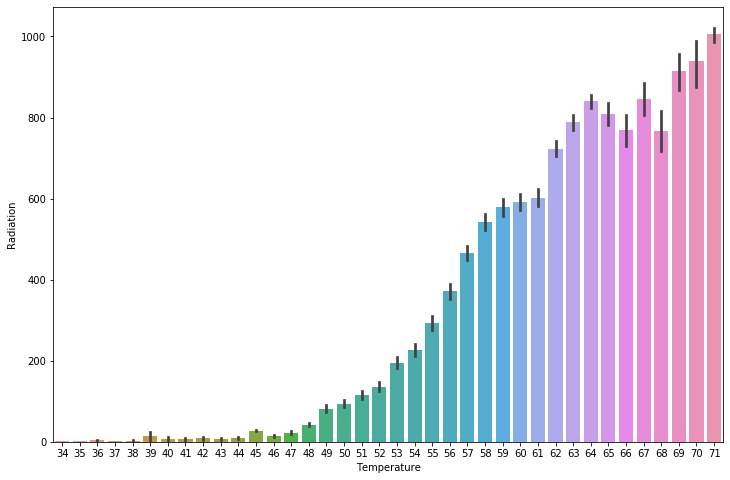

In [30]:
#the ratio of temperature and radiation
plt.figure(figsize=(12,8))
sns.barplot(x='Temperature', y='Radiation', data=data)

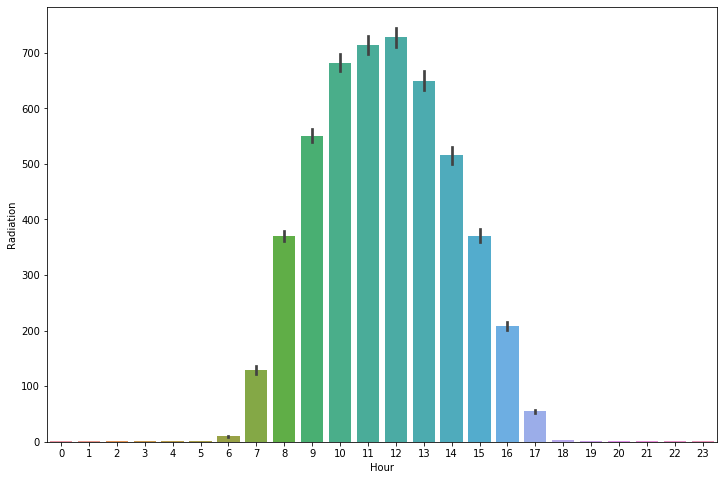

In [31]:
# the amount of radiation per hour
plt.figure(figsize=(12,8))
sns.barplot(x='Hour', y='Radiation', data=data)

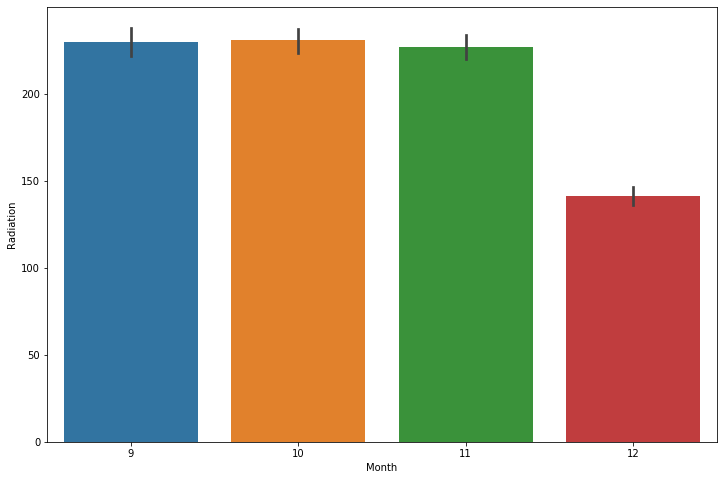

In [32]:
# the amount of radiation per month
plt.figure(figsize=(12,8))
sns.barplot(x="Month", y='Radiation', data=data)

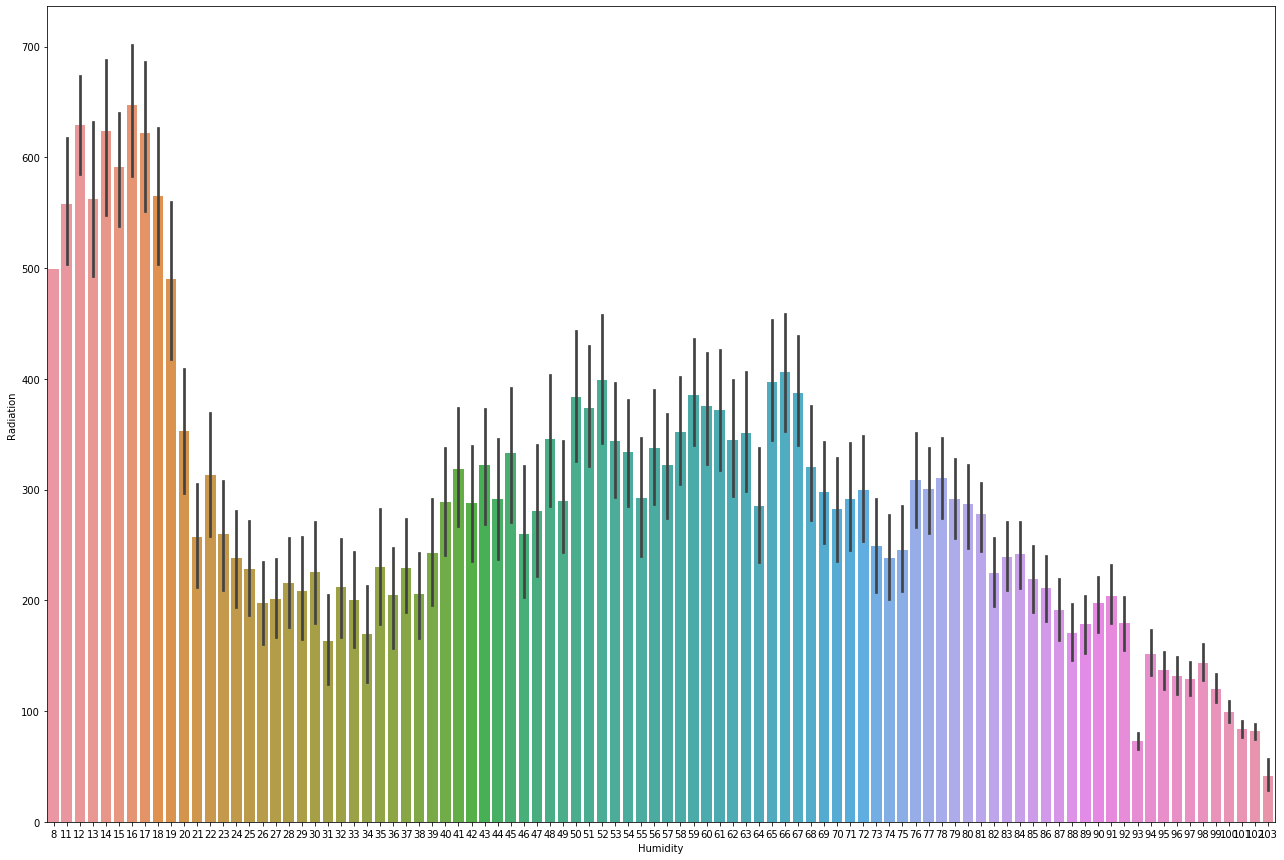

In [33]:
# the ratio of humidity and radiation
plt.figure(figsize=(22,15))
sns.barplot(x='Humidity',y='Radiation', data=data)

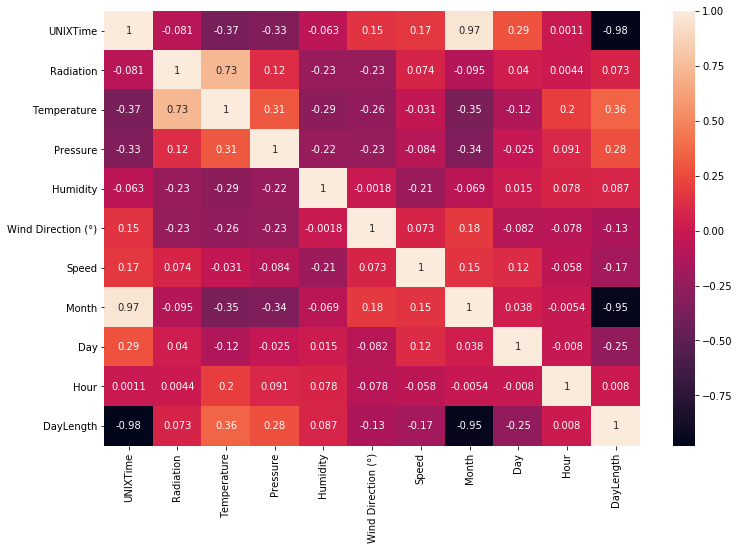

In [10]:
# map of the Pearson correlation coefficient between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [35]:
# removal of unnecessary features
data=data.drop(columns=['Time', 'TimeSunRise', 'TimeSunSet', 'Date', 'UNIXTime',], axis=1)
data.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'Wind Direction (°)', 'Speed', 'Month', 'Day', 'Hour', 'DayLength'],
      dtype='object')

In [36]:
# scaling independent variables
from sklearn.preprocessing import StandardScaler
y=data['Radiation']
X=data.drop(['Radiation'], axis=1)
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [37]:
# dividing the dataset into training and test parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# importing regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [39]:
#LinearRegression
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train,y_train)
LRM_predictions = LinearRegressionModel.predict(X_test)


In [40]:
#RidgeCV
RidgeRegressionModel = RidgeCV(cv=5)
RidgeRegressionModel.fit(X_train,y_train)
Ridge_predictions = RidgeRegressionModel.predict(X_test)


In [41]:
#SGDRegressor
SGDRegressionModel = SGDRegressor(max_iter=1000)
SGDRegressionModel.fit(X_train,y_train)
SGD_predictions = SGDRegressionModel.predict(X_test)


In [42]:
#AdaBoostRegressor
AdaBoostRegressionModel = AdaBoostRegressor(random_state=0, n_estimators=100)
AdaBoostRegressionModel.fit(X_train,y_train)
ABR_predictions = AdaBoostRegressionModel.predict(X_test)


In [43]:
#RandomForestRegressor
RandomForestRegressionModel = RandomForestRegressor()
RandomForestRegressionModel.fit(X_train, y_train)
RFR_predictions = RandomForestRegressionModel.predict(X_test)


In [44]:
#GradientBoostingRegressor
GradientBoostingRegressionModel= GradientBoostingRegressor()
GradientBoostingRegressionModel.fit(X_train,y_train)
GBR_predictions = GradientBoostingRegressionModel.predict(X_test)


In [45]:
#DecisionTreeRegressor
DecisionTreeRegressionModel = DecisionTreeRegressor()
DecisionTreeRegressionModel.fit(X_train, y_train)
DTR_predictions = DecisionTreeRegressionModel.predict(X_test)


In [46]:
# rounding off the coefficient of determination of each model
LRM_score=round(r2_score(y_test, LRM_predictions), 2)
Ridge_score=round(r2_score(y_test, Ridge_predictions), 2)
SGD_score=round(r2_score(y_test, SGD_predictions), 2)
ABR_score=round(r2_score(y_test, ABR_predictions), 2)
RFR_score=round(r2_score(y_test, RFR_predictions), 2)
GBR_score=round(r2_score(y_test, GBR_predictions), 2)
DTR_score=round(r2_score(y_test, DTR_predictions), 2)

In [48]:
# building dataframe containing models and corresponding coefficients of determination 
R2_scores=pd.DataFrame({'Model': ['LinearRegression', 'RidgeCV', 'SGDRegressor', 'AdaBoostRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'DecisionTreeRegressor'],
                        'r2_score': [LRM_score, Ridge_score, SGD_score, ABR_score, RFR_score, GBR_score, DTR_score] })
R2_scores

,Model,r2_score
0,LinearRegression,0.62
1,RidgeCV,0.62
2,SGDRegressor,0.62
3,AdaBoostRegressor,0.81
4,RandomForestRegressor,0.93
5,GradientBoostingRegressor,0.88
6,DecisionTreeRegressor,0.87


In [ ]:
#RandomForestRegressor is the best algorithm for our dataset